In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np


In [14]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import cross_validate
import pickle


"""Since it is a regression problem, I will use the most regression friendly algorythms, those are dec.Tree and linear regr"""

regr = LinearRegression()


In [3]:
dfrent = pd.read_csv('../Project-5-scikitlearn/rent.csv',index_col=False)
dfsale = pd.read_csv('../Project-5-scikitlearn/sale.csv',index_col=False)



dfsale.drop(columns = ['Unnamed: 0','propertyCode','operation'],inplace =True)
dfrent.drop(columns = ['Unnamed: 0','propertyCode','operation'],inplace =True)

In [4]:
rentdummy = pd.get_dummies(dfrent)
saledummy = pd.get_dummies(dfsale)

<AxesSubplot:>

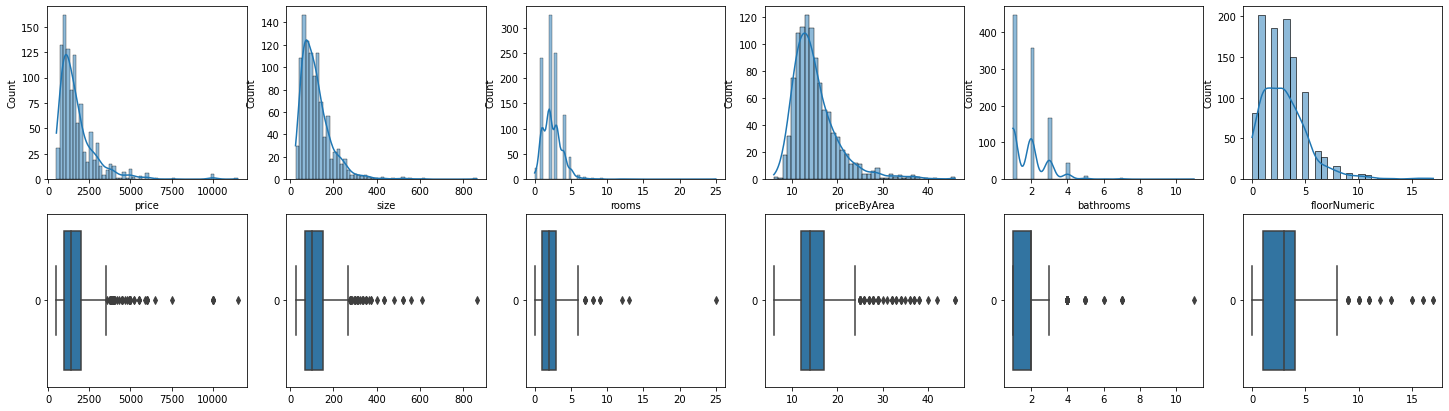

In [5]:
fig, ax = plt.subplots(2,6,sharex='none',figsize=(25,7))
sns.histplot(ax=ax[0,0], data=dfrent['price'],kde=True)
sns.histplot(ax=ax[0,1], data=dfrent['size'],kde=True)
sns.histplot(ax=ax[0,2], data=dfrent['rooms'],kde=True)
sns.histplot(ax=ax[0,3], data=dfrent['priceByArea'],kde=True)
sns.histplot(ax=ax[0,4], data=dfrent['bathrooms'],kde=True)
sns.histplot(ax=ax[0,5], data=dfrent['floorNumeric'],kde=True)


sns.boxplot(ax=ax[1,0],data=dfrent['price'],orient='h')
sns.boxplot(ax=ax[1,1],data=dfrent['size'],orient='h')
sns.boxplot(ax=ax[1,2],data= dfrent['rooms'],orient='h')
sns.boxplot(ax=ax[1,3],data=dfrent['priceByArea'],orient='h')
sns.boxplot(ax=ax[1,4], data=dfrent['bathrooms'],orient='h')
sns.boxplot(ax=ax[1,5], data=dfrent['floorNumeric'],orient='h')


In [6]:
x_train, x_test, y_train, y_test = train_test_split(rentdummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'priceByArea', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']], rentdummy['price'], test_size=0.75,train_size=0.25, random_state=True)


#standardized
x_train_standar = StandardScaler().fit_transform(x_train)
x_test_standar = StandardScaler().fit_transform(x_test)

y_train_standar = StandardScaler().fit_transform(np.array(y_train).reshape(-1,1))
y_test_standar = StandardScaler().fit_transform(np.array(y_test).reshape(-1,1))


xdic = { 'standard':{'train':x_train_standar,  'test':x_test_standar},

        'raw':{'train':x_train,'test':x_test} }


ydic = {'standard':{'train':y_train_standar,'test':y_test_standar},
        
        'raw':{'train':y_train,'test':y_test} }

best_acc = []
acc_list = []

for keys in xdic.keys(): #linear regression test loop
    model = regr.fit(xdic[keys]['train'], ydic[keys]['train'])
    cv_acc = cross_validate(model, xdic[keys]['train'], ydic[keys]['train'], cv=10)['test_score'].mean()
    best_acc.append([cv_acc,'regression', keys])
    acc_list.append(cv_acc)
    print(keys, cv_acc)

print('\n')


for keys in xdic.keys(): #Decision tree test loop
        for depth in range(5,11):
                treereg = tree.DecisionTreeRegressor(max_depth=depth)
                model = treereg.fit(xdic[keys]['train'],ydic[keys]['train'])
                cv_acc = cross_validate(model, xdic[keys]['train'], ydic[keys]['train'], cv=10)['test_score'].mean()
                best_acc.append([cv_acc,'tree', keys, depth])
                acc_list.append(cv_acc)

for best in best_acc:
        if best[0] == max(acc_list):
                print("best",best)
        elif best[0]== min(acc_list):
                print("worst", best)

standard 0.889745210859288
raw 0.8897452108592867


best [0.889745210859288, 'regression', 'standard']
worst [0.8022093681464542, 'tree', 'raw', 5]


In [7]:
#The cross validation indicates that for the rent model, we will use regression and raw data
rentmodel = regr.fit(xdic['raw']['train'], ydic['raw']['train'])

rent_prediction = rentmodel.predict(xdic['raw']['test'])

r2_score(ydic['raw']['test'], rent_prediction)

0.9172909209384377

In [8]:
#Testing with more random data without training it

test_rent = pd.read_csv('../Project-5-scikitlearn/rent_test_cleaned.csv')
test_rent.drop(columns = ['Unnamed: 0','propertyCode','operation'],inplace =True)

test_rent_dummy = pd.get_dummies(test_rent)
test_rent_dummy

predict = rentmodel.predict(test_rent_dummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'priceByArea', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']])
r2_score(test_rent_dummy['price'], predict)

0.9067707796785035

In [15]:
filename_rent = 'rent_model.sav'
pickle.dump(rentmodel, open(filename_rent,'wb'))

<AxesSubplot:>

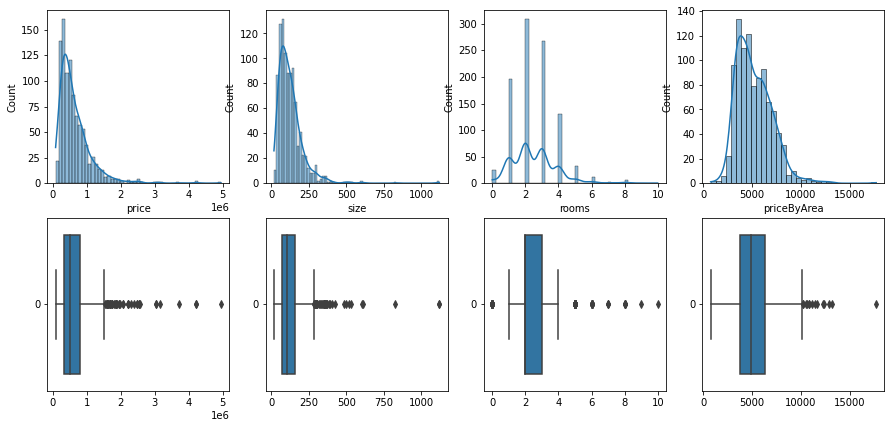

In [9]:
fig, ax = plt.subplots(2,4,sharex='none',figsize=(15,7))
sns.histplot(ax=ax[0,0], data=dfsale['price'],kde=True)
sns.histplot(ax=ax[0,1], data=dfsale['size'],kde=True)
sns.histplot(ax=ax[0,2], data=dfsale['rooms'],kde=True)
sns.histplot(ax=ax[0,3], data=dfsale['priceByArea'],kde=True)

sns.boxplot(ax=ax[1,0],data=dfsale['price'],orient='h')
sns.boxplot(ax=ax[1,1],data=dfsale['size'],orient='h')
sns.boxplot(ax=ax[1,2],data= dfsale['rooms'],orient='h')
sns.boxplot(ax=ax[1,3],data=dfsale['priceByArea'],orient='h')

In [10]:
x_trainsale, x_testsale, y_trainsale, y_testsale = train_test_split(saledummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'priceByArea', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']], saledummy['price'], test_size=0.75,train_size=0.25, random_state=True)


#standardized
x_train_standar_sale = StandardScaler().fit_transform(x_trainsale)
x_test_standar_sale = StandardScaler().fit_transform(x_testsale)

y_train_standar_sale = StandardScaler().fit_transform(np.array(y_trainsale).reshape(-1,1))
y_test_standar_sale = StandardScaler().fit_transform(np.array(y_testsale).reshape(-1,1))


xdicsale = {'standard':{'train':x_train_standar_sale,  'test':x_test_standar_sale},

        'raw':{'train':x_trainsale,'test':x_testsale} }


ydicsale = {'standard':{'train':y_train_standar_sale,'test':y_test_standar_sale},
        
        'raw':{'train':y_trainsale,'test':y_testsale} }

best_accsale = []
acc_listsale = []

for keys in xdic.keys(): #Linear regression test loop
    modelsale = regr.fit(xdicsale[keys]['train'], ydicsale[keys]['train'])

    cv_accsale = cross_validate(model, xdicsale[keys]['train'], ydicsale[keys]['train'], cv=10)['test_score'].mean()

    best_accsale.append([cv_accsale,'regression', keys])
    
    acc_listsale.append(cv_accsale)
    print(keys, cv_accsale)

print('\n')


for keys in xdic.keys(): #Linear regression test loop
        for depth in range(5,11):
                treereg = tree.DecisionTreeRegressor(max_depth=depth)

                model = treereg.fit(xdicsale[keys]['train'],ydicsale[keys]['train'])

                cv_accsale = cross_validate(model, xdicsale[keys]['train'], ydicsale[keys]['train'], cv=10)['test_score'].mean()

                best_accsale.append([cv_accsale,'tree', keys, depth])

                acc_listsale.append(cv_accsale)
                print('depth:',depth,' ',keys, cv_acc)
        print('\n')

for best in best_accsale:
        if best[0] == max(acc_listsale):
                print("best",best)
        elif best[0]== min(acc_listsale):
                print("worst", best)

standard 0.5551986830295131
raw 0.5329277528610915


depth: 5   standard 0.8492172178964722
depth: 6   standard 0.8492172178964722
depth: 7   standard 0.8492172178964722
depth: 8   standard 0.8492172178964722
depth: 9   standard 0.8492172178964722
depth: 10   standard 0.8492172178964722


depth: 5   raw 0.8492172178964722
depth: 6   raw 0.8492172178964722
depth: 7   raw 0.8492172178964722
depth: 8   raw 0.8492172178964722
depth: 9   raw 0.8492172178964722
depth: 10   raw 0.8492172178964722


worst [0.5269540350176557, 'tree', 'standard', 6]
best [0.8520442706317617, 'tree', 'standard', 9]


In [11]:
#The results of the cross validation indicates that the best model is decition tree regressor with raw data max depth 10 

test_sale = pd.read_csv('../Project-5-scikitlearn/sale_test_cleaned.csv')
test_sale.drop(columns = ['Unnamed: 0','propertyCode','operation'],inplace =True)

test_sale_dummy = pd.get_dummies(test_sale)

trees = tree.DecisionTreeRegressor(max_depth=9)

salemodel = trees.fit(xdicsale['raw']['train'], ydicsale['raw']['train'])

sale_predict = salemodel.predict(xdicsale['raw']['test'])
r2_score(ydicsale['raw']['test'], sale_predict)

0.7485119222815014

In [12]:
test_predict = salemodel.predict(test_sale_dummy[['size', 'rooms', 'bathrooms', 'latitude', 'longitude', 'priceByArea', 'floorNumeric', 'propertyType_duplex','propertyType_flat', 'propertyType_penthouse', 'propertyType_studio']])

r2_score(test_sale_dummy['price'], test_predict)

0.6265363883724694

In [16]:
filename_sale = 'sale_model.sav'
pickle.dump(salemodel, open(filename_sale,'wb'))